# Sales Prediction

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from sklearn import metrics


In [2]:
#importing datset
dataset=pd.read_csv(r"C:\Users\AB\Desktop\Advertising.csv")
dataset

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
#checking whether dataset has null values
dataset.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [3]:
#Unnamed colunm
dataset['Unnamed: 0'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [4]:
#above column represent number for each row it has no effect on sales so we drop it
dataset.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
#TV column
dataset['TV'].unique()

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 100.4, 216.4, 182.6, 262.7,
       198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3, 102.7,
       131.1,  69. ,  31.5, 139.3, 216.8, 199.1, 109.8,  26.8, 129.4,
       213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4, 239.8,  75.3,
        68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 134.3,  28.6, 217.7,
       250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4, 296.4,
       280.2, 187.9, 238.2, 137.9,  25. ,  90.4,  13.1, 255.4, 225.8,
       241.7, 175.7, 209.6,  78.2,  75.1, 139.2, 125.7,  19.4, 141.3,
        18.8, 224. , 123.1, 229.5,  87.2,   7.8,  80.2, 220.3,  59.6,
         0.7, 265.2,

C:\Users\AB\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


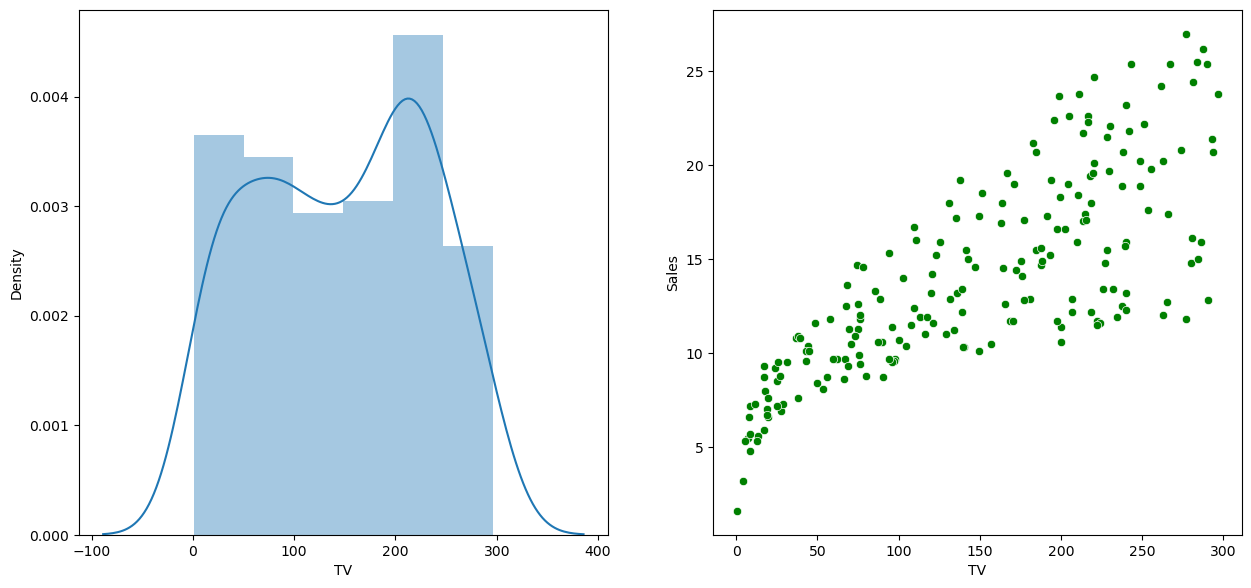

In [6]:
#plotting graph to see corelation between TV and sales
plt.figure(figsize=[15,15])
plt.subplot(221)
sns.distplot(dataset['TV'])
plt.subplot(222)
sns.scatterplot(x='TV',y='Sales',data=dataset,color='green')
plt.show()


from above graph it can be deduced that TV advrtisement has positive corelation w.r.t to sales as it is little negetively skewed with about 2 peaks in the graph  

In [7]:
#Radio column:
dataset['Radio'].unique()

array([37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6,  2.1,  2.6,  5.8,
       24. , 35.1,  7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9, 27.7,  5.1,
       15.9, 16.9, 12.6,  3.5, 29.3, 16.7, 27.1, 16. , 28.3, 17.4,  1.5,
       20. ,  1.4,  4.1, 43.8, 49.4, 26.7, 37.7, 22.3, 33.4,  8.4, 25.7,
       22.5,  9.9, 41.5, 15.8, 11.7,  3.1,  9.6, 41.7, 46.2, 28.8, 28.1,
       19.2, 49.6, 29.5,  2. , 42.7, 15.5, 29.6, 42.8,  9.3, 24.6, 14.5,
       27.5, 43.9, 30.6, 14.3, 33. ,  5.7, 43.7,  1.6, 28.5, 29.9,  7.7,
       20.3, 44.5, 43. , 18.4, 40.6, 25.5, 47.8,  4.9, 33.5, 36.5, 14. ,
       31.6, 21. , 42.3,  4.3, 36.3, 10.1, 17.2, 34.3, 46.4, 11. ,  0.3,
        0.4, 26.9,  8.2, 38. , 15.4, 20.6, 46.8, 35. ,  0.8, 36.9, 26.8,
       21.7,  2.4, 34.6, 32.3, 11.8, 38.9,  0. , 49. , 12. ,  2.9, 27.2,
       38.6, 47. , 39. , 28.9, 25.9, 17. , 35.4, 33.2, 14.8,  1.9,  7.3,
       40.3, 25.8, 13.9, 23.3, 39.7, 21.1, 11.6, 43.5,  1.3, 18.1, 35.8,
       36.8, 14.7,  3.4, 37.6,  5.2, 23.6, 10.6, 20

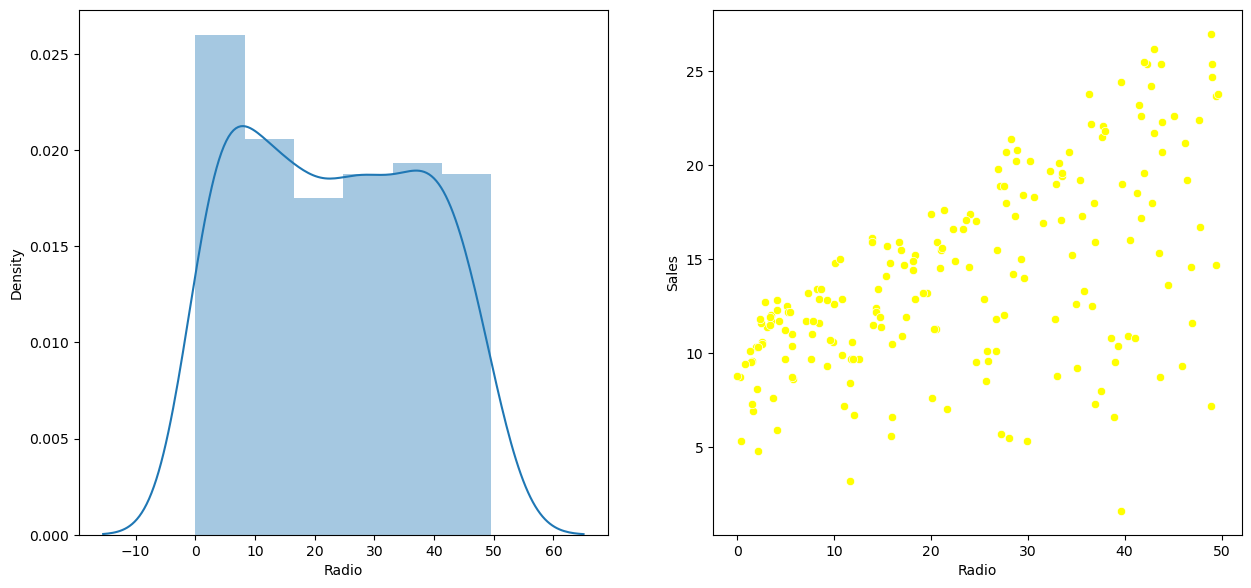

In [11]:
#plotting graph to see corelation between Radio and sales
plt.figure(figsize=[15,15])
plt.subplot(221)
sns.distplot(dataset['Radio'])
plt.subplot(222)
sns.scatterplot(x='Radio',y='Sales',data=dataset,color='yellow')
plt.show()


from above graph it can be deduced that radio advrtisement has positive corelation w.r.t to sales as it is little positviely skewed with about 2 peaks in the graph  

In [8]:
#newspaper Column
dataset["Newspaper"].unique()

array([ 69.2,  45.1,  69.3,  58.5,  58.4,  75. ,  23.5,  11.6,   1. ,
        21.2,  24.2,   4. ,  65.9,   7.2,  46. ,  52.9, 114. ,  55.8,
        18.3,  19.1,  53.4,  49.6,  26.2,  19.5,  12.6,  22.9,  40.8,
        43.2,  38.6,  30. ,   0.3,   7.4,   8.5,   5. ,  45.7,  35.1,
        32. ,  31.6,  38.7,   1.8,  26.4,  43.3,  31.5,  35.7,  18.5,
        49.9,  36.8,  34.6,   3.6,  39.6,  58.7,  15.9,  60. ,  41.4,
        16.6,  37.7,   9.3,  21.4,  54.7,  27.3,   8.4,  28.9,   0.9,
         2.2,  10.2,  11. ,  27.2,  31.7,  19.3,  31.3,  13.1,  89.4,
        20.7,  14.2,   9.4,  23.1,  22.3,  36.9,  32.5,  35.6,  33.8,
        65.7,  16. ,  63.2,  73.4,  51.4,  33. ,  59. ,  72.3,  10.9,
         5.9,  22. ,  51.2,  45.9,  49.8, 100.9,  17.9,   5.3,  29.7,
        23.2,  25.6,   5.5,  56.5,   2.4,  10.7,  34.5,  52.7,  14.8,
        79.2,  46.2,  50.4,  15.6,  12.4,  74.2,  25.9,  50.6,   9.2,
         3.2,  43.1,   8.7,  43. ,   2.1,  65.6,  59.7,  20.5,   1.7,
        12.9,  75.6,

C:\Users\AB\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


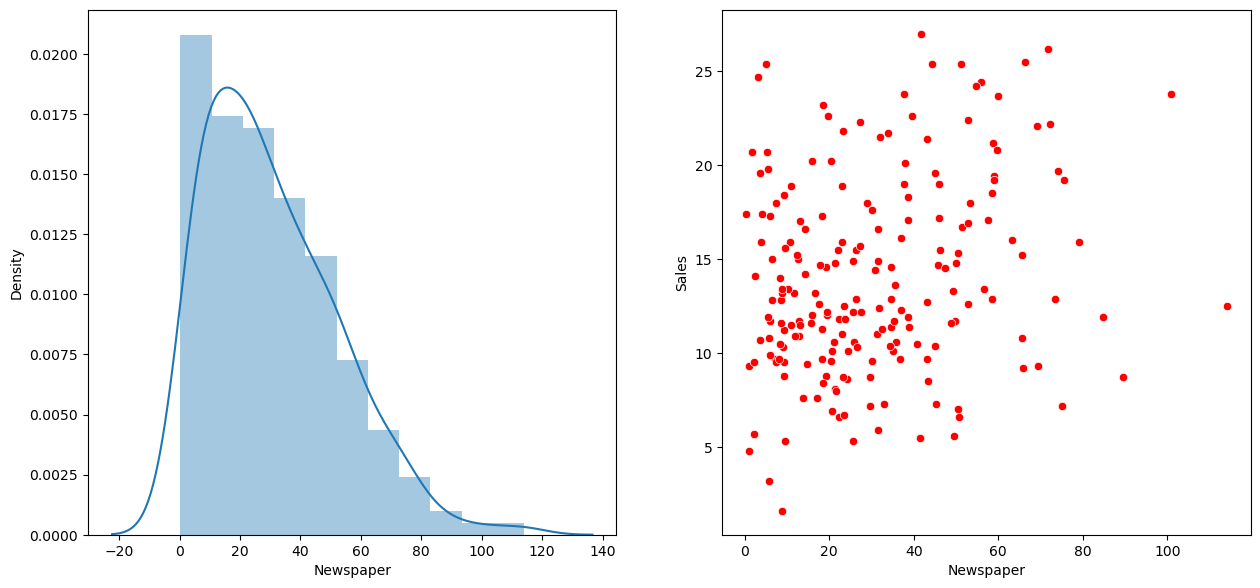

In [11]:
#plotting graph to see corelation between Newspaper and sales
plt.figure(figsize=[15,15])
plt.subplot(221)
sns.distplot(dataset['Newspaper'])
plt.subplot(222)
sns.scatterplot(x='Newspaper',y='Sales',data=dataset,color='red')
plt.show()


from above graph it can be deduced that newspaper advrtisement has also somewhat positive corelation w.r.t to sales as it is postively skewed with ahving only 1 peak on the graph 

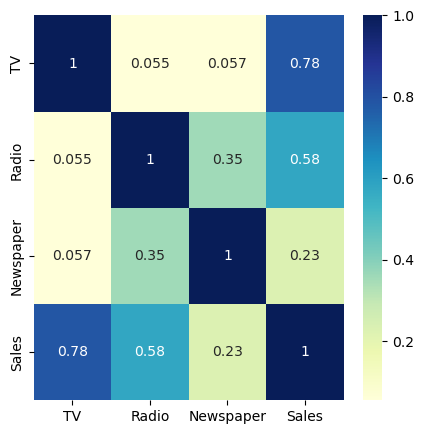

In [9]:
#creatign heatmap to check the corelation of every column w.r.t to sales
plt.figure(figsize=[5,5])
sns.heatmap(dataset.corr(),cmap="YlGnBu",annot=True)
plt.show()

as we can see that TV is the advertisement which is most corelated with sales but radio and newspaper are also corelated to sales somehow

In [10]:
#spliting data into test and train
X=dataset.drop(['Sales'],axis=1)
Y=dataset['Sales']
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=101)

In [11]:
scaler=StandardScaler()

In [12]:
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)


In [13]:
param_grid={'max_depth':[1,2,3,4,5],'min_samples_leaf':[1,2,3,4,5],'min_samples_split':[1,2,3,4,5]}
model=RandomForestRegressor()
gridSearch=GridSearchCV(model,param_grid,scoring='r2',cv=5)

In [14]:
import warnings
warnings.filterwarnings('ignore')

gridSearch.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             scoring='r2')

In [15]:
gridSearch.score(xtrain,ytrain)

0.9907463352343492

In [16]:
best_params = gridSearch.best_params_
print(best_params)

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [17]:
model=RandomForestRegressor(max_depth=5,min_samples_leaf=1,min_samples_split=4)

In [18]:
prediction=model.fit(xtrain,ytrain).predict(xtest)

In [19]:
dataset=pd.DataFrame({'Actual': ytest, 'prediction': np.round(prediction,1)})
dataset.head()

,Actual,prediction
37,14.7,13.3
109,19.8,17.8
31,11.9,12.3
89,16.7,14.8
66,9.5,8.2


In [20]:
metrics.r2_score(ytest,prediction)

0.9732085868189194

In [21]:
metrics.mean_squared_error(ytest,prediction)

0.7933002746987604

In [22]:
metrics.mean_absolute_error(ytest,prediction)

0.6911891402796719

In [23]:
np.sqrt(metrics.mean_squared_error(ytest,prediction))

0.8906740563745866